Modeling Mutagenesis of a Gene
================================

When mutations occur in a genome, they can happen at any point in the genome, 
typically at uniform (constant) density, i.e. any point in the genome is equally
likely to be mutated as any other point.  One simple model of this probability
distribution is called the **Poisson Distribution**: given the density $\mu$
of the number of events occurring on *average* in an interval,
it predicts the probability that exactly *k* events will occur in that interval.

Getting started with Python
============================

Try out the following to learn some basic commands in Python:

- you can see tutorials and look up whatever information you need about Python at https://docs.python.org).
- to run the code in a given cell, click the code cell to select it, then click the **Run** button above

We'll work with the following tools in this project:

- `scipy.stats`: statistical models such as the Poisson
- `matplotlib.pyplot`: a great tool for graphing data in both simple and sophisticated ways
- `json`: for reading and writing the standard JSON data file format

In [202]:
import scipy.stats
from matplotlib import pyplot
# the following line tells Jupyter to automatically display any graph generated in a cell by matplotlib
%matplotlib inline
import json

How to Set a Variable Value
===============================

In Python we assign a value to a variable as follows:

In [203]:
mu = 10 # set the expected number of mutations per gene to 10

How to View a Variable's Value
===============================

As an even easier alternative to `print()`, you can simply enter the name of the variable whose value you want to view on the last line of a Jupyter cell:

In [204]:
mu

10

Creating a Poisson Distribution Model
===========================================

Let's construct a probability model for predicting the number of mutations
that will hit a gene in a mutagenesis experiment with a mutagenesis
density of $\mu=10$ mutations / gene:

In [205]:
model = scipy.stats.poisson(mu)

How to Get a List of What You Can Do with a Variable
=================================================

Python also provides a ``dir()`` function to see a "directory" of the functions
and attributes that an object contains, e.g.:

In [206]:
#dir(model)

Note several items in this list that we will use in this project: 

* ``model.rvs()``: draw a sample of random values from this model;
* ``model.pmf(k)``: calculate the probability of getting exactly *k* mutations;
* ``model.cdf(k)``: calculate the probability of getting *k* or fewer mutations;
* ``model.sf(k)``: calculate the probability of getting more than *k* mutations.

For example, to draw a random number of mutations from this model, just type:

In [207]:
model.rvs() # if no sample size specified, just return a single value

7

You can tell it to generate a sample of 100 random draws:

In [208]:
model.rvs(100)

array([ 9,  6, 11, 10,  8, 13,  9, 12,  8, 18, 17,  8, 14, 14, 16, 12, 17,
       12, 16, 10,  6,  9,  7, 18,  9,  5,  7,  7,  8,  9,  8, 17, 12, 12,
        9,  4,  9, 11,  9,  8, 13,  7,  8, 12, 11, 11,  9,  9,  7,  9,  9,
        7,  9,  6, 13,  8, 12,  4,  5, 15, 10,  7,  7, 16, 13, 10, 15, 10,
       15,  9,  9, 13, 12, 11,  8,  7, 11,  9,  9,  7, 17, 14, 16,  8,  6,
       11, 12, 11,  8, 13, 10,  7, 16,  9, 10,  6, 15,  7,  9, 11])

As you can see, while the *average* number of hits is 10, on any given draw the
actual number of mutations may not be exactly 10.  We can also tell Python to 
calculate the average from an observed sample, using Python's `sum()` function:

In [209]:
sum(model.rvs(100)) / 100

10.23

How to Graph Data in Python
===============================

One basic way to look at this distribution is to graph the probability of
the number of mutations *k*, i.e. to plot $p(k|\mu=10)$.
This is easy to do using the ``matplotlib``
package (for further tutorials and documentation on matplotlib's
many excellent capabilities,
just Google it).

Let's construct a list of $X$ values for which to make
our graph.  Let's try X=0 to X=20, using Python's `range()` function:

In [210]:
xvals = range(21)

(you can learn what ``range()`` does by viewing its result as a ``list``). E.g.:

In [211]:
list(xvals)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Notice that we had to ask `range()` for 21 values because that is actually the number of integers from 0 to 20.  By default `range()` starts at 0 (not 1), but you can override that; see the Python docs.

Now we compute the list of probability values for each of these
x values:

In [212]:
pvals = [model.pmf(x) for x in xvals]

We can immediately graph this using a simple line plot:

[(0, 4.5399929762484854e-05), (1, 0.0004539992976248486), (2, 0.0022699964881242435), (3, 0.007566654960414144), (4, 0.01891663740103538), (5, 0.03783327480207079), (6, 0.06305545800345125), (7, 0.090079225719216), (8, 0.11259903214902009), (9, 0.12511003572113372), (10, 0.12511003572113372), (11, 0.11373639611012128), (12, 0.09478033009176803), (13, 0.07290794622443707), (14, 0.05207710444602615), (15, 0.034718069630684245), (16, 0.021698793519177594), (17, 0.012763996187751505), (18, 0.007091108993195334), (19, 0.003732162627997529), (20, 0.0018660813139987742)]


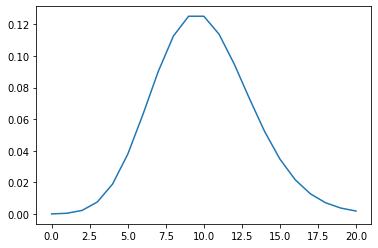

In [213]:
pyplot.plot(xvals, pvals)
print(list(zip(xvals, pvals)))

Note that you can superimpose multiple plots on one figure by simply
running another ``plot()`` command for each dataset you want to plot
on that figure.

**QUESTION**: What is the most likely number of mutations (i.e. value of *k* with the highest probability)?

**ANSWER**: The likely number of mutations, i.e. the value of *k* with the highest probability is approximately 10.

Graphing the Cumulative Distribution Function
=========================================

The so-called *cumulative distribution function*, or CDF, computes
the total probability of getting *k* or fewer mutations.  I.e. 
``model.cdf(k)=`` $p(0 \le K \le k|\mu=10)$.  

**QUESTION**: Adapt the previous ``pvals`` example
code (to use the `cdf()` function instead of the `pmf()` function), to get Python to plot the CDF in the following code cell:

**ANSWER**: Code snippet below.

[(0, 4.539992976248486e-05), (1, 0.0004993992273873336), (2, 0.0027693957155115775), (3, 0.010336050675925726), (4, 0.029252688076961124), (5, 0.06708596287903189), (6, 0.130141420882483), (7, 0.22022064660169907), (8, 0.3328196787507191), (9, 0.4579297144718523), (10, 0.5830397501929852), (11, 0.6967761463031061), (12, 0.7915564763948745), (13, 0.8644644226193109), (14, 0.9165415270653372), (15, 0.9512595966960213), (16, 0.9729583902151989), (17, 0.9857223864029503), (18, 0.9928134953961456), (19, 0.9965456580241432), (20, 0.998411739338142)]


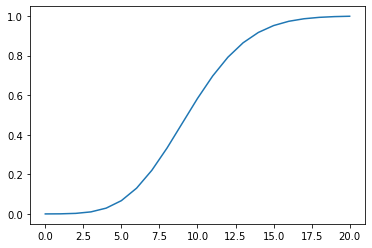

In [214]:
pvals = [model.cdf(x) for x in xvals]
pyplot.plot(xvals, pvals)
print(list(zip(xvals,pvals)))

**QUESTION**: If you wanted to choose a value of *k* such that in 90% of mutagenesis
experiments the actual number of mutations would be *k* or fewer, what
value of *k* would you choose?

**ANSWER**: If I wanted to choose a value of *k* such that in 90% of mutagenesis experiments, the actual number of mutations would be *k* or fewer, I'd choose approximately 14.

Graphing the Survival Function
======================================

The so-called *survival function*, or SF, computes
the total probability of getting more than *k* mutations.  I.e. 
``model.sf(k) =`` $p(K > k|\mu=10)$.  

**QUESTION**: Adapt the previous ``pvals`` example
code (to use the `sf()` function), to get Python to plot the survival function in the following code cell:

**ANSWER**: Code snippet below.

[(0, 0.9999546000702375), (1, 0.9995006007726127), (2, 0.9972306042844884), (3, 0.9896639493240743), (4, 0.9707473119230389), (5, 0.9329140371209681), (6, 0.869858579117517), (7, 0.779779353398301), (8, 0.6671803212492808), (9, 0.5420702855281478), (10, 0.41696024980701485), (11, 0.3032238536968938), (12, 0.20844352360512552), (13, 0.13553557738068908), (14, 0.08345847293466284), (15, 0.04874040330397868), (16, 0.027041609784801086), (17, 0.014277613597049663), (18, 0.007186504603854357), (19, 0.0034543419758568334), (20, 0.0015882606618580573)]


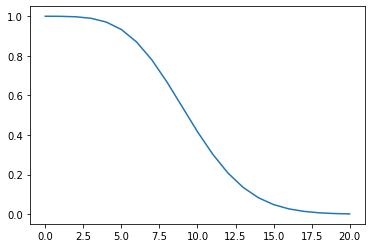

In [215]:
pvals = [model.sf(x) for x in xvals]
pyplot.plot(xvals, pvals)
print(list(zip(xvals,pvals)))

**QUESTION**: If you wanted to choose a value of *k* such that in 90% of mutagenesis
experiments the actual number of mutations would be greater than *k*, what
value of *k* would you choose?

**ANSWER**: If I wanted to choose a value of *k* such that in 90% of mutagenesis experiments, the actual number of mutations would be greater than *k*, I'd choose approximately 5.

An Example Mutagenesis Experiment Case
========================================

In a typical phenotype sequencing experiment for bacteria, we might
sequence 30 mutant genomes, with 50 mutations per genome, and 4200 genes
per genome.

**QUESTION**: What do you expect to be the average total number of mutations found per gene in this experiment design?

**ANSWER**: I'd expect the average total number of mutations found per genes to be (30*50)/4200 = 1500/4200.

**QUESTION**: Based on that value of $\mu$, plot the probability that a given gene will have more than *k* mutations
in this experiment design, over the range $0 \le k \le 10$.

**ANSWER**: Code snippet below.

μ: 0.35714285714285715


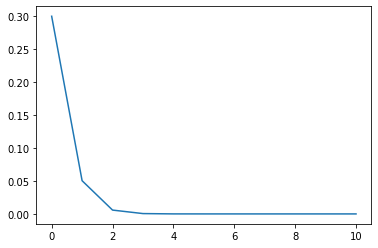

In [216]:
mu = 1500/4200
print('μ:', mu)
model = scipy.stats.poisson(mu)
xvals = range(11)
pvals = [model.sf(x) for x in xvals]
pyplot.plot(xvals, pvals)

**QUESTION**: How exactly would you adapt your code to calculate the probability that a gene will have *k or more* mutations (which is what we actually need for our Phenotype Sequencing p-value)?  Note this is slightly different from *more than k* mutations!

**ANSWER**: To calculate the probability that a gene will have *k or more* mutations, I'd take the survival function, which gives the probability of finding more than k mutations, and add it to the probability mass function, which gives the probability of finding exactly k mutations.

A colleague planning a phenotype sequencing experiment says "Under this
design, it's unlikely to get a gene with 3 or more mutations
under this non-target gene model, so we
can use that criterion as a reliable way of picking out genes that
cause the phenotype (i.e. target genes)."

**QUESTION**: Plot the total number of genes expected to have *k* or more mutations
in this experiment design, over the range $0 \le k \le 10$.
Based on this graph, comment on the reliability of your colleague's criterion.

**ANSWER**: Code snippet below. I would say that my colleague's criterion is relatively reliable, as approximately only ~27 genes out of 4200 genes have 3 or more mutations. 

26.758120012847375


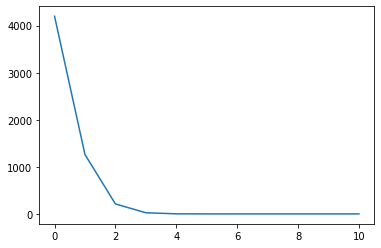

In [217]:
gvals = [4200*(model.pmf(x) + model.sf(x)) for x in xvals]
print(sum(gvals[3:]))
pyplot.plot(xvals, gvals)

Using JSON to load the Phenotype Sequencing Data
======================

JSON is a simple data format that is convenient for storing numbers, strings, lists and dictionaries, with the added benefit that it's easily "human-readable".  Python provides a library for working with JSON data easily.  Here's a simple example showing what JSON format actually looks like, and how to load JSON data from any text input:

In [218]:
import json
json.dumps([model.pmf(x) for x in range(5)]) # dump this list to a string in JSON format, and just display it

'[0.6996725373751304, 0.24988304906254655, 0.04462197304688331, 0.005312139648438497, 0.0004742981828962938]'

In [219]:
data = json.loads('["foo", {"bar":["baz", null, 1.0, 2]}]') # load data from a string in JSON format
data[0], data[1]['bar'][2] # display some of that data

('foo', 1.0)

### Reading a JSON dataset from a file

Large datasets are usually stored as files.  In Python we must first `open()` the file for reading, then use the appropriate reader function for reading that specific format.  Here's how we read a phenotype sequencing dataset from JSON:

- `open()` takes the path to the file (as a string).  In this case our file `phenoseq.json` is here in the directory we're working in.  If it were somewhere else we'd have to specify its full path e.g. `/home/user/Documents/experiment1/phenoseq.json`.
- Many operations (like `open()`) create temporary data that needs to be cleaned up properly when we're finally done with it.  Python's `with` statement makes this clean-up automatic and guaranteed: you simply indent whatever code you need to run on that temporary data (in this case, the `ifile` handle for reading the open file).  When Python completes that indented block it will automatically perform the necessary clean-up for you.
- `json.load()` actually reads the data from the file.
- we inspect the dataset using Python's `type()` function, which returns the Python **class** of the specified object -- intuitively "what it is".
- Python's `len()` function tells you the length of (number of items in) any container.
- this dataset is a Python dictionary whose entries are E. coli gene names each associated with the list of mutations found in that gene (genes with no mutations are not reported in this dataset).
- each mutation is stored as a dictionary with various attributes, e.g. `pos` is the position of the mutation in the E. coli genome; `ref` is the original nucleotide at that position in the "reference genome"; `alt` is the mutated nucleotide that was observed at that position, etc.

In [220]:
with open('phenoseq.json') as ifile:
    geneSNPs = json.load(ifile)
print('geneSNPs is a %s with %d entries.' % (type(geneSNPs), len(geneSNPs))) # %s prints arg as a string, %d as an integer
geneSNPs['ileS'] # display the mutations found in E. coli gene ileS

geneSNPs is a <class 'dict'> with 1728 entries.


[{'alt': 'T', 'nalt': 33, 'ref': 'C', 'pos': 23028, 'nreads': 141},
 {'alt': 'A', 'nalt': 40, 'ref': 'G', 'pos': 22430, 'nreads': 136}]

### Counting the mutations in each gene

For phenotype sequencing the "score" for each gene that we will use to calculate its p-value is simply the count of mutations in that gene.  The following code shows you how to build a dictionary of gene mutation-counts and then extract different aspects of it in ways that you will use in subsequent steps:

- Note that Python provides a convenient "slice notation" `l[start:stop]` to get a segment of a list `l` beginning at item `l[start]` and ending at item `l[stop - 1]` (in other words, item `l[stop]` will NOT be included).  Note also that you can leave out either `start` or `stop`, e.g. `l[:10]` gets a list of the first 10 items in the list, exactly the same as if you had specified `l[0:10]`.

In [221]:
snpCounts = {}
for gene, snps in geneSNPs.items():
    snpCounts[gene] = len(snps)
print('ileS contains %d mutations' % snpCounts['ileS'])
print('first ten genes:', list(snpCounts)[:10]) # iterating over the dict just gets its gene names
first10 = list(snpCounts.values())[:10] # values() gets the mutation counts
print('first ten mutation counts:', first10)
first10.sort() # this re-orders the list in ascending order
print('sorted in ascending order:', first10)
first10 = [(t[1],t[0]) for t in snpCounts.items()][:10] # a list of (count,gene) tuples, note we swap the 2 values 
first10.sort() # the first value in each tuple (count) will drive the sort
print('tuples sorted in ascending order:', first10)

ileS contains 2 mutations
first ten genes: ['rhtB', 'speF', 'speG', 'xseB', 'speA', 'ybcM', 'ybcO', 'ybcJ', 'ybcK', 'ybcF']
first ten mutation counts: [1, 2, 1, 3, 2, 3, 2, 3, 1, 1]
sorted in ascending order: [1, 1, 1, 1, 2, 2, 2, 3, 3, 3]
tuples sorted in ascending order: [(1, 'rhtB'), (1, 'speG'), (1, 'ybcF'), (1, 'ybcK'), (2, 'speA'), (2, 'speF'), (2, 'ybcO'), (3, 'xseB'), (3, 'ybcJ'), (3, 'ybcM')]


### Constructing a simplistic Phenoseq p-value test

We will construct a single non-target gene model for all genes in E. coli, assuming that the probability of random mutation is the same in each gene.  This is like assuming all genes are "the same size" (which is not actually true).

**QUESTION**: assuming that E. coli has 4200 total genes, write code that sums the total number of mutations in this dataset, computes the average number of mutations per gene $\mu$, prints it, and constructs a Poisson model for non-target genes using this $\mu$ value.

**ANSWER**: Code snippet below.

In [225]:
total = sum(snpCounts.values())
mu = total/4200
print('μ:', mu)
model = scipy.stats.poisson(mu)

μ: 0.7871428571428571


### Scoring the Isobutanol Tolerance dataset using our p-value test

**QUESTION**: write code to calculate p-values for every gene in the dataset, then sort it and print the top ten (most statistically significant) genes.  Hint: make a list of (pval,gene) tuples, so you can sort by pval but still see the gene names with the best p-values.

**ANSWER**: Code snippet below.

In [223]:
pvals = [model.pmf(x)+model.sf(x) for x in snpCounts.values()]
pvals = list(zip(pvals, snpCounts.keys()))
pvals.sort()
for i in range(10):
    print('{}. Gene {} (p-value: {})'.format(i+1, pvals[i][1], pvals[i][0]) )

1. Gene acrB (p-value: 5.113281115030872e-35)
2. Gene ydfJ (p-value: 2.2875066691590834e-17)
3. Gene entF (p-value: 5.720755599697114e-11)
4. Gene cusA (p-value: 8.767692092457328e-10)
5. Gene nfrA (p-value: 8.767692092457328e-10)
6. Gene prpE (p-value: 8.767692092457328e-10)
7. Gene rhsD (p-value: 1.2329808646660377e-08)
8. Gene aes (p-value: 1.5783121710746368e-07)
9. Gene fepA (p-value: 1.5783121710746368e-07)
10. Gene mdlB (p-value: 1.5783121710746368e-07)


### Applying the Bonferroni correction

Let's apply the Bonferroni correction to choose a p-value cutoff that will yield only one expected false positive among the 4200 genes in E. coli.

**QUESTION**: write code to calculate the appropriate `fcut` value, and print the list of (pval,gene) that pass this p-value test.  Hint: you can simply print an increasing number of entries from your sorted list, until the p-value exceeds your `fcut`.

**ANSWER**: Code snippet below.

In [200]:
passed = []
fcut = 1/4200
print('fcut:', fcut)
for p in pvals:
    if p[0] <= fcut:
        passed.append((p[0], p[1]))
    else:
        break
for i in range(len(passed)):
    print('{}.'.format(i+1), passed[i])

fcut: 0.0002380952380952381
1. (5.113281115030872e-35, 'acrB')
2. (2.2875066691590834e-17, 'ydfJ')
3. (5.720755599697114e-11, 'entF')
4. (8.767692092457328e-10, 'cusA')
5. (8.767692092457328e-10, 'nfrA')
6. (8.767692092457328e-10, 'prpE')
7. (1.2329808646660377e-08, 'rhsD')
8. (1.5783121710746368e-07, 'aes')
9. (1.5783121710746368e-07, 'fepA')
10. (1.5783121710746368e-07, 'mdlB')
11. (1.5783121710746368e-07, 'sbcC')
12. (1.8214589363507663e-06, 'marC')
13. (1.8214589363507663e-06, 'paoC')
14. (1.8214589363507663e-06, 'ybaE')
15. (1.8214589363507663e-06, 'ybaL')
16. (1.8214589363507663e-06, 'ykgC')
17. (1.8214589363507663e-06, 'yneO')
18. (1.8729472053887065e-05, 'allB')
19. (1.8729472053887065e-05, 'bcsC')
20. (1.8729472053887065e-05, 'fdnG')
21. (1.8729472053887065e-05, 'fhlA')
22. (1.8729472053887065e-05, 'gsk')
23. (1.8729472053887065e-05, 'ispA')
24. (1.8729472053887065e-05, 'kefA')
25. (1.8729472053887065e-05, 'lhr')
26. (1.8729472053887065e-05, 'mdtB')
27. (1.8729472053887065e-05